In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
import time

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append(os.environ['REPO_DIR'] + '/utilities')
from utilities2015 import *
from metadata import *
from data_manager import *
from annotation_utilities import *
from registration_utilities import *

Setting environment for Local Macbook Pro


In [13]:
stack = 'MD594'

In [14]:
contour_df_wrt_original = DataManager.load_annotation_v4(stack=stack, by_human=True, 
                                                         timestamp='latest', suffix='contours',
                                                         download_s3=False)

latest timestamp:  05312018035134


In [15]:
out_resolution = '10.0um'
out_resolution_um = convert_resolution_string_to_um(resolution=out_resolution, stack=stack)

In [16]:
converter = CoordinatesConverter(stack=stack)

# Method 1

In [12]:
contour_resol = 'raw'

In [13]:
for name_s in all_known_structures_sided:
# for name_s in ['7N_L']:
    try:

        name_u, side = parse_label(name_s, singular_as_s=True)[:2]

        contours_wrt_orignal_rawRawSection = [np.array([(x, y, cnt['section']) for x, y in cnt['vertices']])
         for cid, cnt in contour_df_wrt_original[(contour_df_wrt_original['name'] == name_u) & (contour_df_wrt_original['side'] == side)].iterrows()]

        contours_xyz_wrt_wholebrain_outResol = []
        for cnt_original_rawRawSection in contours_wrt_orignal_rawRawSection:
            cnt_wrt_alignedPadded_rawRawSection = \
            converter.convert_frame_and_resolution(p=cnt_original_rawRawSection,
                                                  stack=stack,
                                                  in_wrt='original', in_resolution='%s_%s_section' % (contour_resol,contour_resol), 
                                                   out_wrt='alignedPadded', out_resolution='%s_%s_section' % (out_resolution, out_resolution))

            cnt_wrt_wholebrain_outResol = converter.convert_frame_and_resolution(p=cnt_wrt_alignedPadded_rawRawSection,
                                          stack=stack,
                                          in_wrt='wholebrain', in_resolution='%s_%s_section' % (out_resolution, out_resolution), 
                                            out_wrt='wholebrain', out_resolution=out_resolution)

            contours_xyz_wrt_wholebrain_outResol.append(cnt_wrt_wholebrain_outResol)

        volume_volResol, origin_wrt_wholebrain_volResol = \
        interpolate_contours_to_volume(contours_xyz=contours_xyz_wrt_wholebrain_outResol, 
                                       interpolation_direction='z',
                                       len_interval=20.,
                                      return_origin_instead_of_bbox=True)

        # Save
        
        vol_fp = DataManager.get_original_volume_filepath_v2(stack_spec=dict(name=stack, 
                                                                     vol_type='annotationAsScore',
                                                            resolution=out_resolution),
                                        structure=name_s)
        save_data(volume_volResol, vol_fp)

        origin_fp = DataManager.get_original_volume_origin_filepath_v3(stack_spec=dict(name=stack, 
                                                                         vol_type='annotationAsScore',
                                                                        resolution=out_resolution),
                                            structure=name_s, wrt='wholebrain')
        save_data(origin_wrt_wholebrain_volResol, origin_fp)

    except:
        sys.stderr.write("Error reconstructing %s\n" % name_s)
        continue

aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_5N_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_5N_L.bp"
return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_5N_L_origin_wrt_wholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_5N_L_origin_wrt_wholebrain.txt"
return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_5N_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_5N_R.bp"
return code: 0
aws s3 cp "/

return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_LRt_L_origin_wrt_wholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_LRt_L_origin_wrt_wholebrain.txt"
return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_LRt_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_LRt_R.bp"
return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_LRt_R_origin_wrt_wholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScore

return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_SNR_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_SNR_R.bp"
return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_SNR_R_origin_wrt_wholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_SNR_R_origin_wrt_wholebrain.txt"
return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_3N_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_3N_L.bp"
return c

return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_PBG_R_origin_wrt_wholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_PBG_R_origin_wrt_wholebrain.txt"
return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_10N_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_10N_L.bp"
return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_10N_L_origin_wrt_wholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScore

return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_IC.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_IC.bp"
return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_IC_origin_wrt_wholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_IC_origin_wrt_wholebrain.txt"
return code: 0


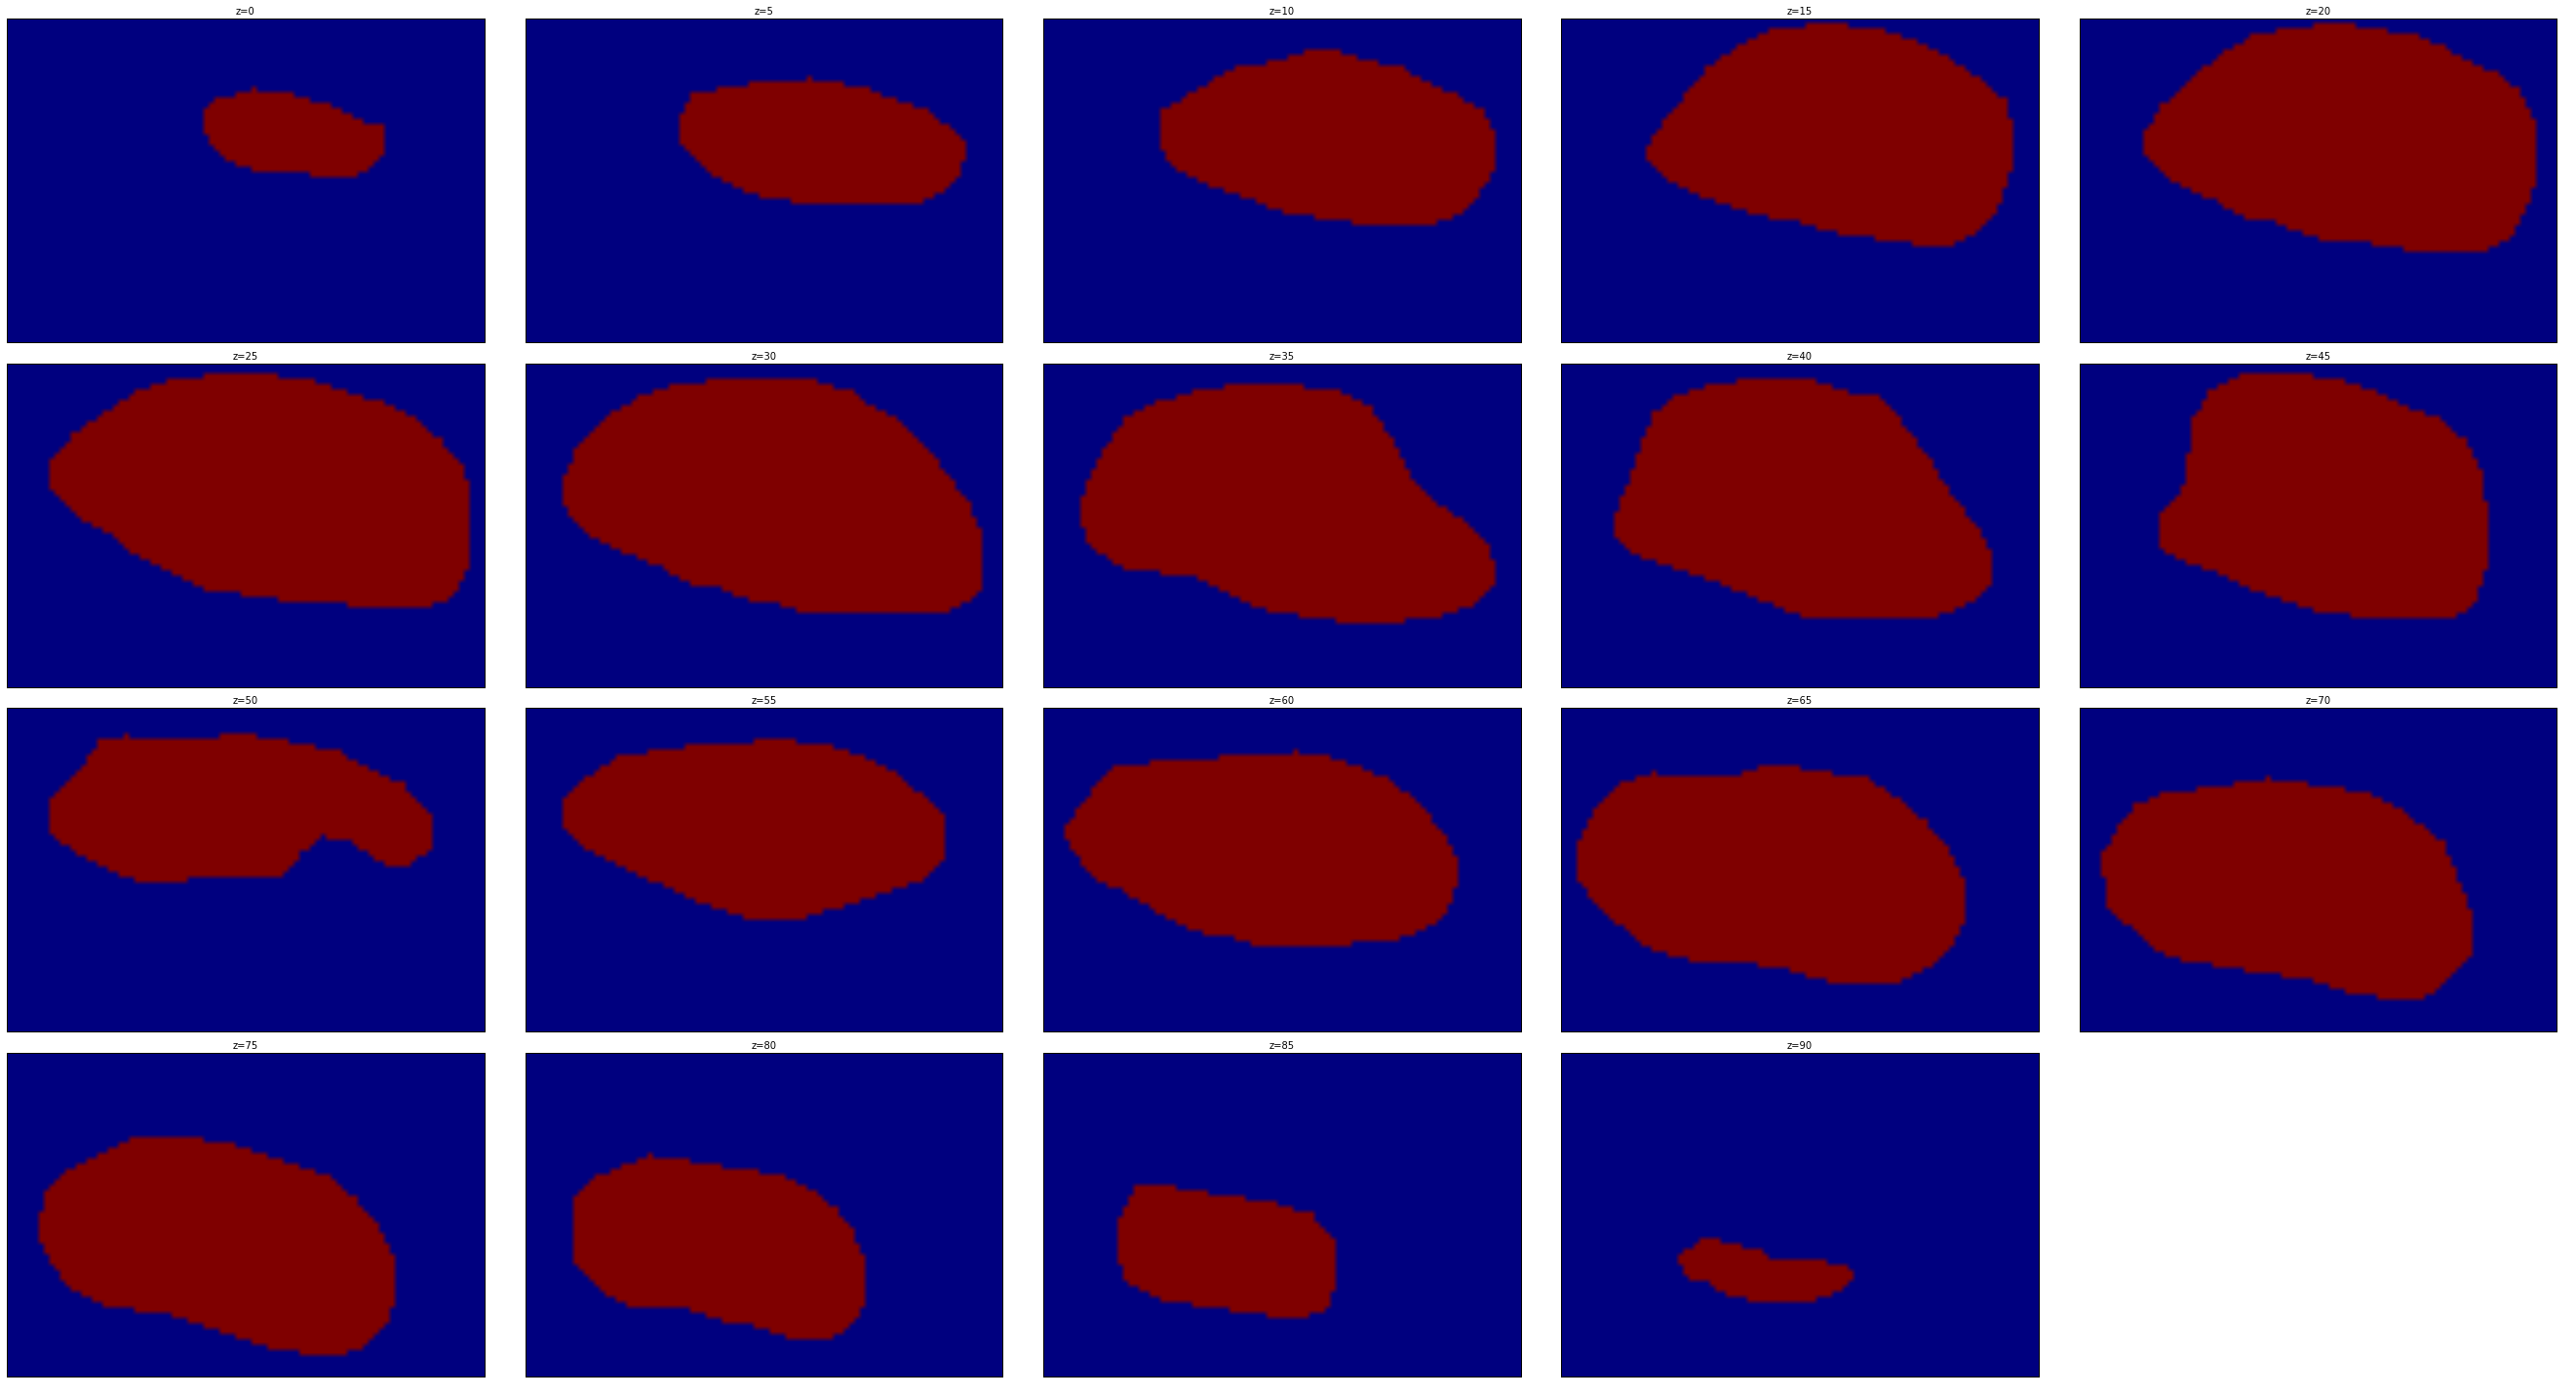

In [9]:
display_volume_sections(volume_volResol)

# Method 2

In [17]:
contours_xyz_wrt_wholebrain_outResol_all_names = defaultdict(list)

for cnt_id, contour in contour_df_wrt_original.iterrows():
    
    name_s = compose_label(structure_name=contour['name'], side=contour['side'])
    contour_resol = contour['resolution']
    section = contour['section']
    vertices_wrt_original = contour['vertices']
    n = len(vertices_wrt_original)
    
    vertices_wrt_alignedPadded_rawRawSection = \
    converter.convert_frame_and_resolution(p=np.c_[vertices_wrt_original, section * np.ones((n,))],
                                          stack=stack,
                                          in_wrt='original', in_resolution='%s_%s_section' % (contour_resol,contour_resol), 
                                           out_wrt='alignedPadded', out_resolution='%s_%s_section' % (out_resolution, out_resolution))

    vertices_wrt_wholebrain = converter.convert_frame_and_resolution(p=vertices_wrt_alignedPadded_rawRawSection,
                                      stack=stack,
                                      in_wrt='wholebrain', in_resolution='%s_%s_section' % (out_resolution, out_resolution), 
                                        out_wrt='wholebrain', out_resolution=out_resolution)

#     print vertices_wrt_alignedPadded_rawRawSection[0], vertices_wrt_wholebrain[0]
    
    contours_xyz_wrt_wholebrain_outResol_all_names[name_s].append(vertices_wrt_wholebrain)
    
contours_xyz_wrt_wholebrain_outResol_all_names.default_factory = None

In [18]:
valid_level = .5

surround_distance_um = 200.
surround_distance_voxel = surround_distance_um / out_resolution_um
print "surround size (in voxels):", surround_distance_voxel

reconstructed_brain_wrt_wholebrain_outResol = {}

for name, cnts3d_wrt_wholebrain_outResol in contours_xyz_wrt_wholebrain_outResol_all_names.iteritems():    
    
    if name not in all_known_structures_sided:
        continue
        
    print name
    reconstructed_brain_wrt_wholebrain_outResol[name] = interpolate_contours_to_volume(interpolation_direction='z',
                                                    contours_xyz=cnts3d_wrt_wholebrain_outResol, 
                                                    len_interval=20.,
                                                        return_origin_instead_of_bbox=True)

    surround_name = convert_to_surround_name(name, margin='%dum' % surround_distance_um)

    reconstructed_brain_wrt_wholebrain_outResol[surround_name] = \
    get_surround_volume_v3(volume=reconstructed_brain_wrt_wholebrain_outResol[name], 
                           wall_level=valid_level, distance=surround_distance_voxel, 
                           prob=True,
                           return_origin_instead_of_bbox=True)

surround size (in voxels): 20.0
LRt_R
Pn_L
7N_R
7N_L
Pn_R
LRt_L
12N
3N_L
6N_R
SNC_R
3N_R
6N_L
10N_R
Tz_L
LC_R
10N_L
VLL_L
VLL_R
RtTg
Tz_R
Sp5O_R
SNR_L
SNR_R
Sp5O_L
5N_L
VCP_R
VCP_L
Sp5C_L
DC_R
VCA_L
Sp5I_L
RMC_R
RMC_L
Sp5I_R
VCA_R
DC_L
Amb_R
7n_R
4N_R
7n_L
4N_L
LC_L
SC
Amb_L
PBG_L
Sp5C_R
PBG_R
AP
5N_R
SNC_L
IC


In [19]:
# display_volume_sections(reconstructed_brain_wrt_wholebrain_outResol['7N_L'][0])

In [20]:
for s, (vol_outResol, origin_wrt_wholebrain_outResol) in reconstructed_brain_wrt_wholebrain_outResol.iteritems():
    vol_fp = DataManager.get_original_volume_filepath_v2(stack_spec=dict(name=stack, 
                                                                     vol_type='annotationAsScore',
                                                            resolution=out_resolution),
                                        structure=s)
    save_data(vol_outResol, vol_fp)

    origin_fp = DataManager.get_original_volume_origin_filepath_v3(stack_spec=dict(name=stack, 
                                                                     vol_type='annotationAsScore',
                                                                    resolution=out_resolution),
                                        structure=s, wrt='wholebrain')
    save_data(origin_wrt_wholebrain_outResol, origin_fp)

aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_LRt_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_LRt_R.bp"
return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_LRt_R_origin_wrt_wholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_LRt_R_origin_wrt_wholebrain.txt"
return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_Pn_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_Pn_L.bp"
return code: 0
aws s3 c

return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_Sp5I_L_surround_200um.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_Sp5I_L_surround_200um.bp"
return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_Sp5I_L_surround_200um_origin_wrt_wholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_Sp5I_L_surround_200um_origin_wrt_wholebrain.txt"
return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_Tz_R_surround_200um.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsS

return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_SNR_L_surround_200um.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_SNR_L_surround_200um.bp"
return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_SNR_L_surround_200um_origin_wrt_wholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_SNR_L_surround_200um_origin_wrt_wholebrain.txt"
return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_Tz_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_vo

return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_Sp5C_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_Sp5C_R.bp"
return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_Sp5C_R_origin_wrt_wholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_Sp5C_R_origin_wrt_wholebrain.txt"
return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_SNR_R_surround_200um.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolu

return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_5N_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_5N_L.bp"
return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_5N_L_origin_wrt_wholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_5N_L_origin_wrt_wholebrain.txt"
return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_RMC_R_surround_200um.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_RMC_R

return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_Sp5C_L_origin_wrt_wholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_Sp5C_L_origin_wrt_wholebrain.txt"
return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_Sp5C_R_surround_200um.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_Sp5C_R_surround_200um.bp"
return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_Sp5C_R_surround_200um_origin_wrt_wholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreV

return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_VCA_R_origin_wrt_wholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_VCA_R_origin_wrt_wholebrain.txt"
return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_DC_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_DC_L.bp"
return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_DC_L_origin_wrt_wholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVol

return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_IC_surround_200um_origin_wrt_wholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_IC_surround_200um_origin_wrt_wholebrain.txt"
return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_PBG_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_PBG_L.bp"
return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_PBG_L_origin_wrt_wholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_

return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_7n_L_surround_200um.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_7n_L_surround_200um.bp"
return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_7n_L_surround_200um_origin_wrt_wholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_7n_L_surround_200um_origin_wrt_wholebrain.txt"
return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/MD594_10.0um_annotationAsScoreVolume_IC.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume/score_volumes/